
<h1 style="text-align:center; font-size:200%;">Devoir Datamining</h1>
<h4 style="text-align:left;">Réaliser par : DAGHMOUMI Marouan</h4>
<h4 style="text-align:left;">Encadrer par : CHRIT Salma</h4>

## Importation des biblio et dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('DataMeteo12 Complet.csv')

In [3]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


# Analyse des Données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [6]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

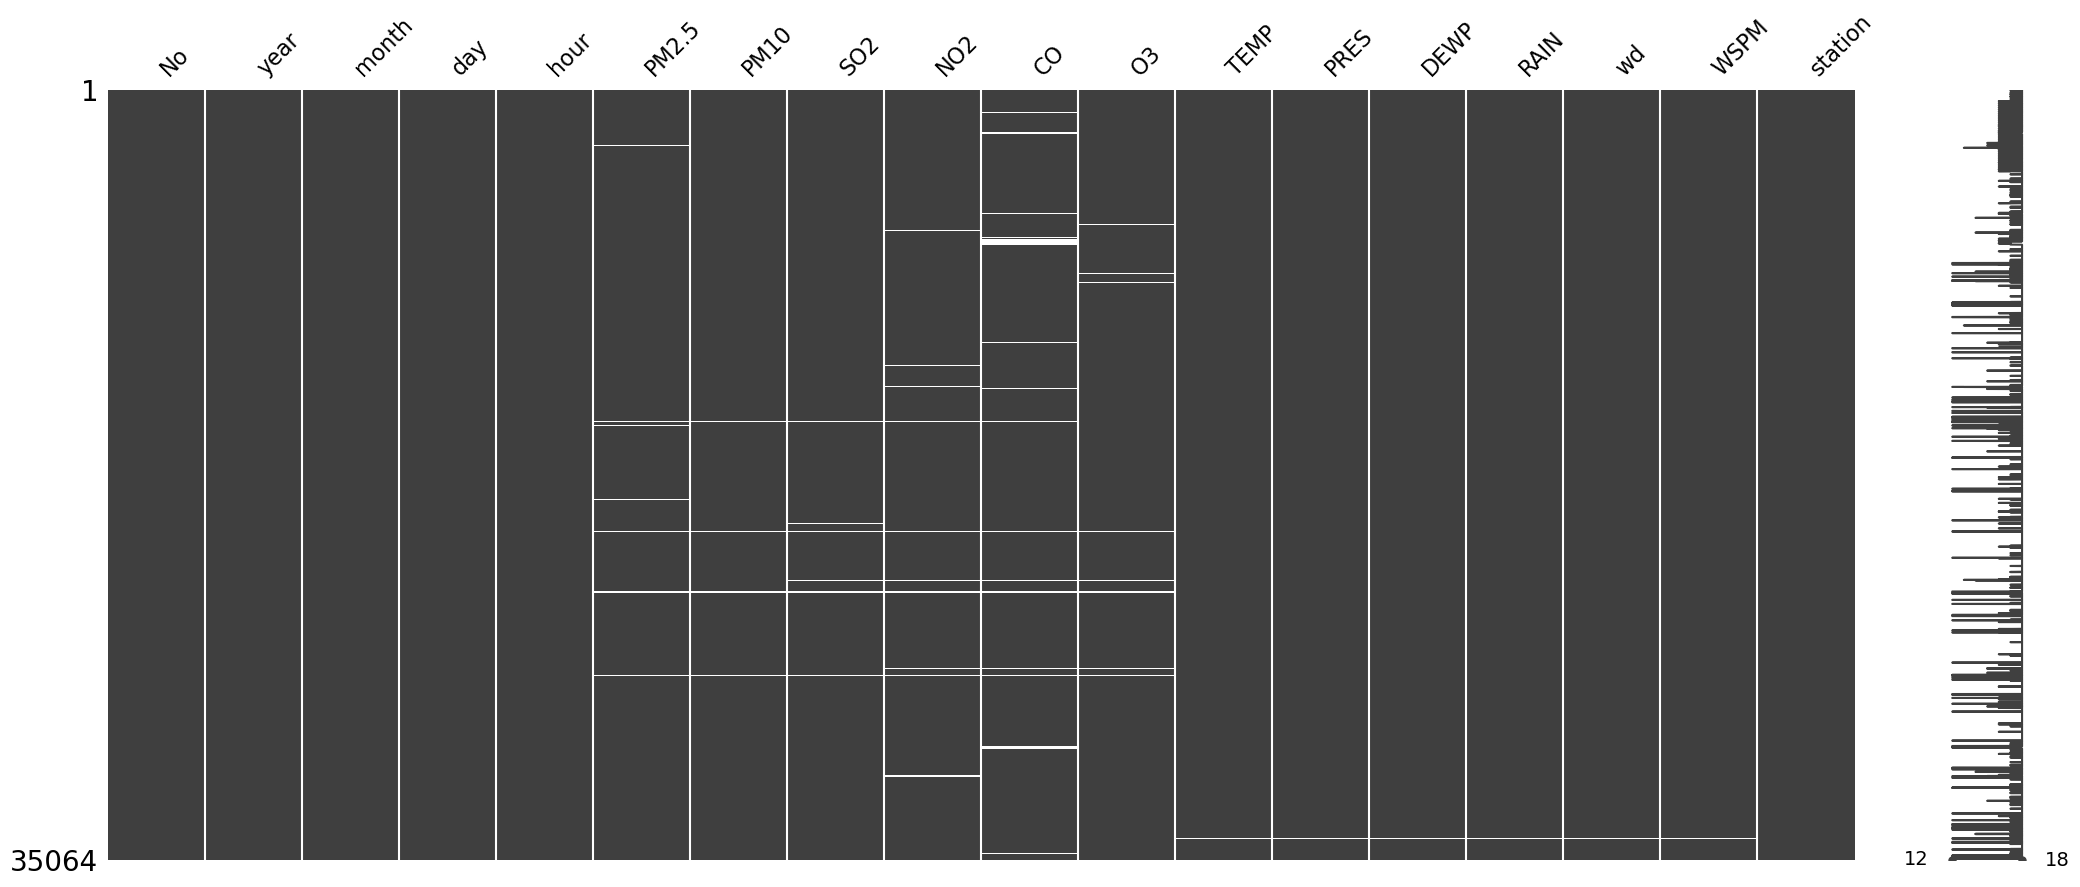

In [7]:
msno.matrix(df)
plt.show()

## Prétraitement des Données

<Axes: xlabel='station'>

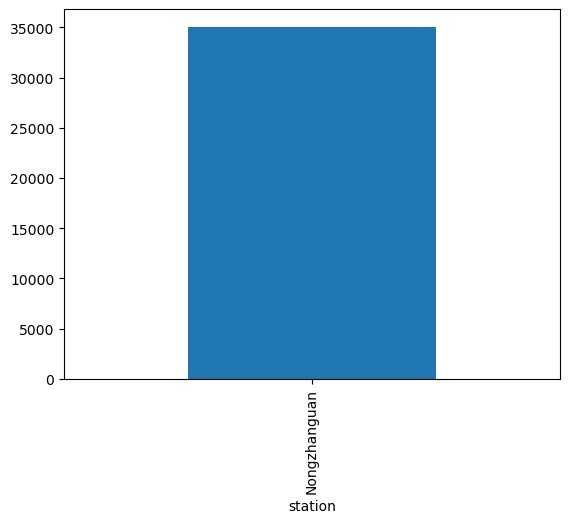

In [8]:
df['station'].value_counts().plot(kind='bar')

### La colonne "station" ne contient qu'une seule valeur pour toutes les entrées. alors on peut le supprimer.

In [9]:
df.drop(columns='station', axis=1, inplace=True)
df.drop(columns='No', axis=1, inplace=True)

In [10]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2


<Axes: xlabel='wd'>

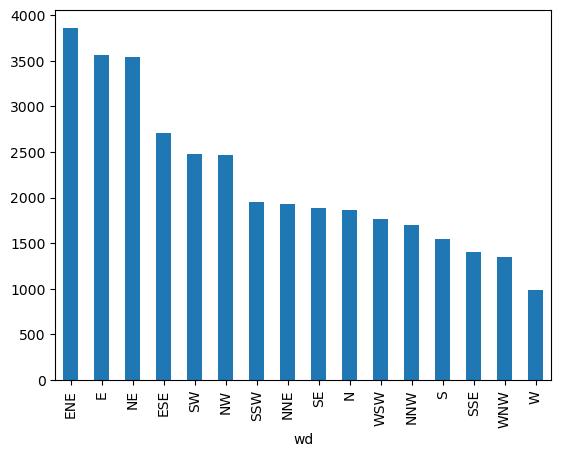

In [11]:
df['wd'].value_counts().plot(kind='bar')

### La colonne “wd” contient des valeur non numerique.
### Les variables de "wd" aloros va été encodée en variables numériques en utilisant une méthode de mapping

In [12]:
direction_mapping = {
    'ENE': 0, 'E': 1, 'NE': 2, 'ESE': 3, 'SW': 4,
    'SSW': 5, 'NNE': 6, 'SE': 7, 'N': 8, 'WSW': 9,
    'NNW': 10, 'S': 11, 'SSE': 12, 'WNW': 13,
    'W': 14, 'NW': 14
}


In [13]:
df['wd_numeric'] = df['wd'].map(direction_mapping)
df.drop(columns='wd', axis=1, inplace=True)

In [14]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_numeric
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,5.7,10.0
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,3.9,14.0
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,5.3,10.0
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,4.9,8.0
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,3.2,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,2.4,14.0
35060,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,0.9,13.0
35061,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,1.1,14.0
35062,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,1.2,10.0


### Nous avons normalisé les variables "PRES" (pression atmosphérique) et "CO" (concentration de monoxyde de carbone) en utilisant la méthode de mise à l'échelle MinMaxScaler. 

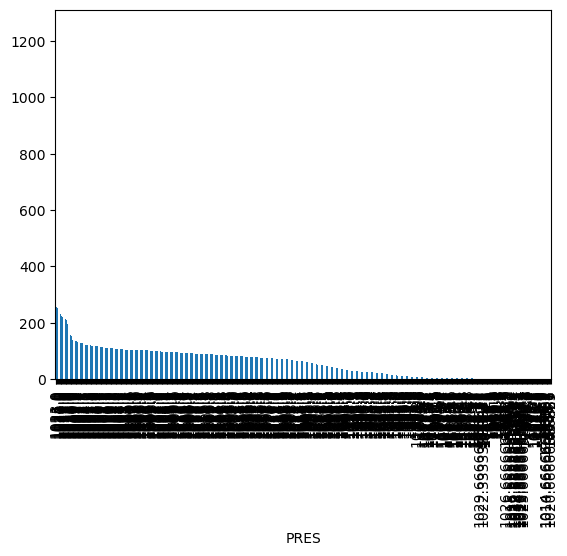

In [15]:
df["PRES"].value_counts().plot(kind='bar')
plt.hist(df["PRES"],bins='auto')
plt.show()

In [16]:
scaler = MinMaxScaler()
pres_values = df['PRES'].values.reshape(-1,1)
pres_scaled = scaler.fit_transform(pres_values)
df['PRES_scaled'] = pres_scaled
df.drop(columns='PRES', axis=1, inplace=True)

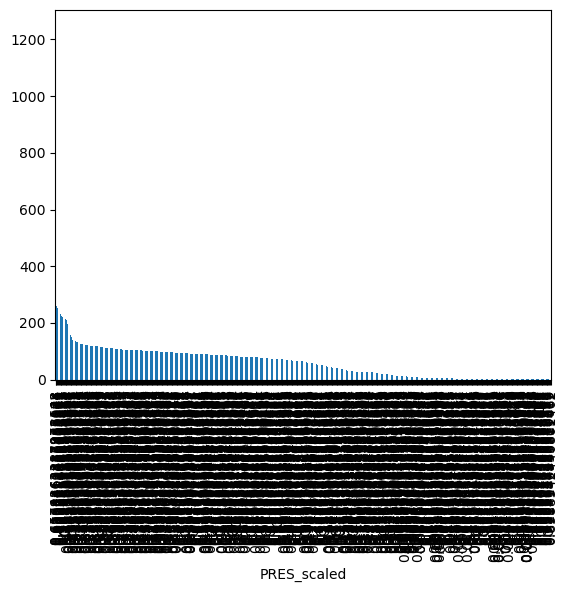

In [17]:
df["PRES_scaled"].value_counts().plot(kind='bar')
plt.hist(df["PRES_scaled"],bins='auto')
plt.show()

In [18]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,WSPM,wd_numeric,PRES_scaled
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,-21.4,0.0,5.7,10.0,0.681239
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,-22.1,0.0,3.9,14.0,0.692168
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,-24.6,0.0,5.3,10.0,0.695811
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,-25.5,0.0,4.9,8.0,0.712204
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,-24.5,0.0,3.2,10.0,0.728597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,-16.2,0.0,2.4,14.0,0.480874
35060,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,-15.1,0.0,0.9,13.0,0.482696
35061,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,-13.3,0.0,1.1,14.0,0.493625
35062,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,-12.9,0.0,1.2,10.0,0.497268


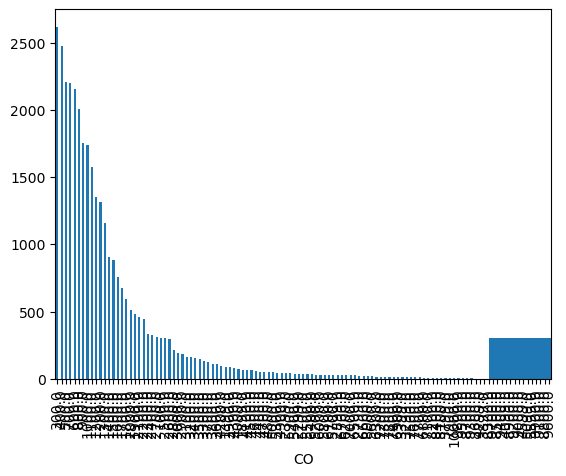

In [19]:
df["CO"].value_counts().plot(kind='bar') ## standardization
plt.hist(df["CO"],bins='auto')
plt.show()

In [20]:
scaler = MinMaxScaler()
pres_values = df['CO'].values.reshape(-1,1)
pres_scaled = scaler.fit_transform(pres_values)
df['CO_scaled'] = pres_scaled
df.drop(columns='CO', axis=1, inplace=True)

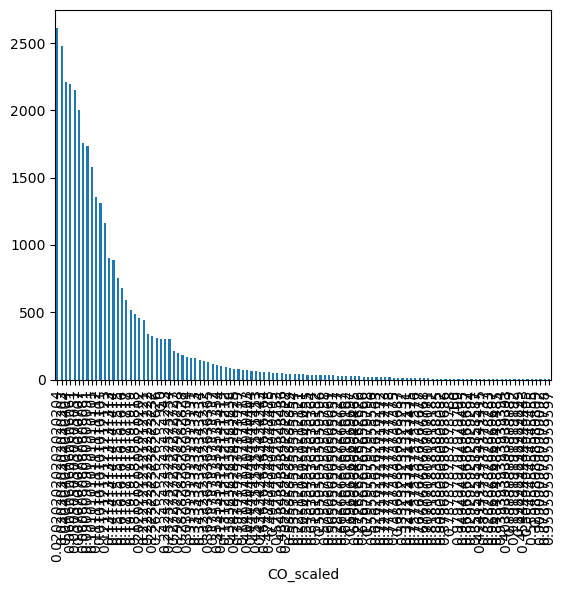

In [21]:
df["CO_scaled"].value_counts().plot(kind='bar')
plt.hist(df["CO_scaled"],bins='auto')
plt.show()

In [22]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,DEWP,RAIN,WSPM,wd_numeric,PRES_scaled,CO_scaled
0,2013,3,1,0,5.0,14.0,4.0,12.0,85.0,-0.5,-21.4,0.0,5.7,10.0,0.681239,0.010101
1,2013,3,1,1,8.0,12.0,6.0,14.0,84.0,-0.7,-22.1,0.0,3.9,14.0,0.692168,0.010101
2,2013,3,1,2,3.0,6.0,5.0,14.0,83.0,-1.2,-24.6,0.0,5.3,10.0,0.695811,0.010101
3,2013,3,1,3,5.0,5.0,5.0,14.0,84.0,-1.4,-25.5,0.0,4.9,8.0,0.712204,0.010101
4,2013,3,1,4,5.0,5.0,6.0,21.0,77.0,-1.9,-24.5,0.0,3.2,10.0,0.728597,0.010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,72.0,12.5,-16.2,0.0,2.4,14.0,0.480874,0.030303
35060,2017,2,28,20,18.0,27.0,3.0,37.0,59.0,11.6,-15.1,0.0,0.9,13.0,0.482696,0.030303
35061,2017,2,28,21,15.0,39.0,5.0,50.0,41.0,10.8,-13.3,0.0,1.1,14.0,0.493625,0.050505
35062,2017,2,28,22,11.0,35.0,6.0,49.0,41.0,10.5,-12.9,0.0,1.2,10.0,0.497268,0.040404


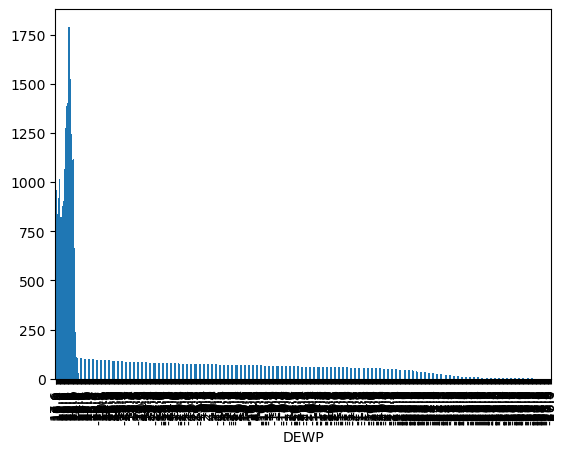

In [23]:
df["DEWP"].value_counts().plot(kind='bar')
plt.hist(df["DEWP"],bins='auto')
plt.show()

In [24]:
scaler = MinMaxScaler()
pres_values = df['DEWP'].values.reshape(-1,1)
pres_scaled = scaler.fit_transform(pres_values)
df['DEWP_scaled'] = pres_scaled
df.drop(columns='DEWP', axis=1, inplace=True)

In [25]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,RAIN,WSPM,wd_numeric,PRES_scaled,CO_scaled,DEWP_scaled
0,2013,3,1,0,5.0,14.0,4.0,12.0,85.0,-0.5,0.0,5.7,10.0,0.681239,0.010101,0.216849
1,2013,3,1,1,8.0,12.0,6.0,14.0,84.0,-0.7,0.0,3.9,14.0,0.692168,0.010101,0.205928
2,2013,3,1,2,3.0,6.0,5.0,14.0,83.0,-1.2,0.0,5.3,10.0,0.695811,0.010101,0.166927
3,2013,3,1,3,5.0,5.0,5.0,14.0,84.0,-1.4,0.0,4.9,8.0,0.712204,0.010101,0.152886
4,2013,3,1,4,5.0,5.0,6.0,21.0,77.0,-1.9,0.0,3.2,10.0,0.728597,0.010101,0.168487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,72.0,12.5,0.0,2.4,14.0,0.480874,0.030303,0.297972
35060,2017,2,28,20,18.0,27.0,3.0,37.0,59.0,11.6,0.0,0.9,13.0,0.482696,0.030303,0.315133
35061,2017,2,28,21,15.0,39.0,5.0,50.0,41.0,10.8,0.0,1.1,14.0,0.493625,0.050505,0.343214
35062,2017,2,28,22,11.0,35.0,6.0,49.0,41.0,10.5,0.0,1.2,10.0,0.497268,0.040404,0.349454


## GESTION DES Valeurs MANQUANTES

### Nous avons rempli les valeurs manquantes dans le jeu de données en utilisant la méthode de l'imputation par la moyenne

In [26]:
mean_values = df.mean()
data = df.fillna(mean_values)

In [27]:
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,RAIN,WSPM,wd_numeric,PRES_scaled,CO_scaled,DEWP_scaled
0,2013,3,1,0,5.0,14.0,4.0,12.0,85.0,-0.5,0.0,5.7,10.0,0.681239,0.010101,0.216849
1,2013,3,1,1,8.0,12.0,6.0,14.0,84.0,-0.7,0.0,3.9,14.0,0.692168,0.010101,0.205928
2,2013,3,1,2,3.0,6.0,5.0,14.0,83.0,-1.2,0.0,5.3,10.0,0.695811,0.010101,0.166927
3,2013,3,1,3,5.0,5.0,5.0,14.0,84.0,-1.4,0.0,4.9,8.0,0.712204,0.010101,0.152886
4,2013,3,1,4,5.0,5.0,6.0,21.0,77.0,-1.9,0.0,3.2,10.0,0.728597,0.010101,0.168487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,72.0,12.5,0.0,2.4,14.0,0.480874,0.030303,0.297972
35060,2017,2,28,20,18.0,27.0,3.0,37.0,59.0,11.6,0.0,0.9,13.0,0.482696,0.030303,0.315133
35061,2017,2,28,21,15.0,39.0,5.0,50.0,41.0,10.8,0.0,1.1,14.0,0.493625,0.050505,0.343214
35062,2017,2,28,22,11.0,35.0,6.0,49.0,41.0,10.5,0.0,1.2,10.0,0.497268,0.040404,0.349454


In [28]:
data.isnull().sum()

year           0
month          0
day            0
hour           0
PM2.5          0
PM10           0
SO2            0
NO2            0
O3             0
TEMP           0
RAIN           0
WSPM           0
wd_numeric     0
PRES_scaled    0
CO_scaled      0
DEWP_scaled    0
dtype: int64

# APPRENTISSAGE NON SUPERVISE :

## KMeans

### Nous avons utilisé l'algorithme de clustering Kmeans pour regrouper les observations en 3 clusters distincts.

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [30]:
data['Target'] = kmeans.labels_

In [31]:
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,RAIN,WSPM,wd_numeric,PRES_scaled,CO_scaled,DEWP_scaled,Target
0,2013,3,1,0,5.0,14.0,4.0,12.0,85.0,-0.5,0.0,5.7,10.0,0.681239,0.010101,0.216849,1
1,2013,3,1,1,8.0,12.0,6.0,14.0,84.0,-0.7,0.0,3.9,14.0,0.692168,0.010101,0.205928,1
2,2013,3,1,2,3.0,6.0,5.0,14.0,83.0,-1.2,0.0,5.3,10.0,0.695811,0.010101,0.166927,1
3,2013,3,1,3,5.0,5.0,5.0,14.0,84.0,-1.4,0.0,4.9,8.0,0.712204,0.010101,0.152886,1
4,2013,3,1,4,5.0,5.0,6.0,21.0,77.0,-1.9,0.0,3.2,10.0,0.728597,0.010101,0.168487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,72.0,12.5,0.0,2.4,14.0,0.480874,0.030303,0.297972,1
35060,2017,2,28,20,18.0,27.0,3.0,37.0,59.0,11.6,0.0,0.9,13.0,0.482696,0.030303,0.315133,1
35061,2017,2,28,21,15.0,39.0,5.0,50.0,41.0,10.8,0.0,1.1,14.0,0.493625,0.050505,0.343214,1
35062,2017,2,28,22,11.0,35.0,6.0,49.0,41.0,10.5,0.0,1.2,10.0,0.497268,0.040404,0.349454,1


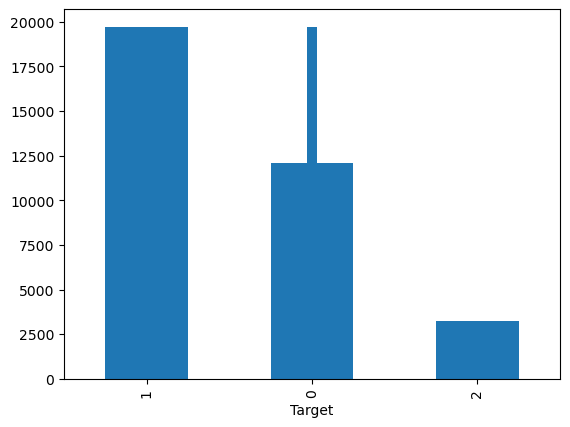

In [32]:
data["Target"].value_counts().plot(kind='bar')
plt.hist(data["Target"],bins='auto')
plt.show()

# APPRENTISSAGE SUPERVISE :

## K PLUS PROCHES VOISINS (KNN)

#### Séparation des données en ensembles d'entraînement et de test

In [33]:
X = data.drop('Target', axis=1)
y = data['Target'] 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred_KNN = knn.predict(X_test)

In [38]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy_KNN)

Accuracy: 0.9867389134464566


In [39]:
conf_matrix = confusion_matrix(y_test, y_pred_KNN)

In [40]:
conf_matrix

array([[2388,   35,   14],
       [  29, 3940,    0],
       [  15,    0,  592]])

## SUPPORT VECTOR MACHINE (SVM)

In [41]:
svm = SVC(kernel='linear')

In [42]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [43]:
y_pred_svm = svm.predict(X_test)

In [44]:
accuracy_SVM = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_SVM)

Accuracy: 0.9992870383573363


In [45]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
conf_matrix

array([[2434,    2,    1],
       [   2, 3967,    0],
       [   0,    0,  607]])

## ARBRE DE DÉCISION (DT)

In [46]:
DT = DecisionTreeClassifier()

In [47]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred_dt = DT.predict(X_test)

In [49]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

Accuracy: 0.9804648509910167


In [50]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix

array([[2367,   58,   12],
       [  58, 3911,    0],
       [   9,    0,  598]])

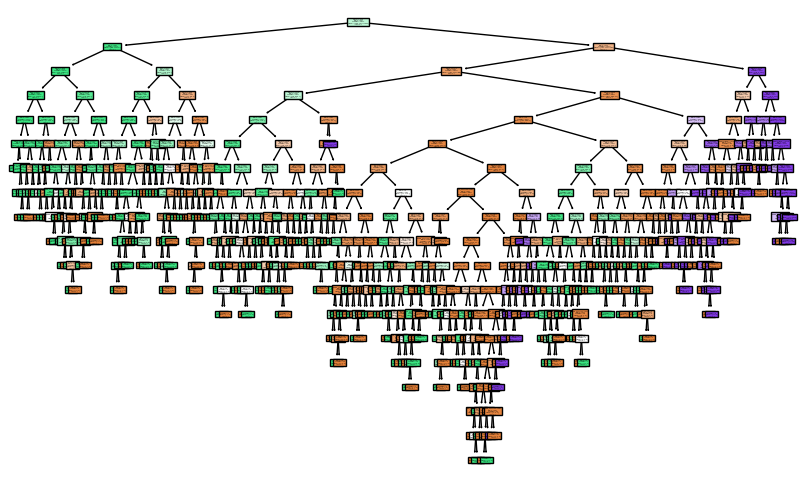

In [51]:
plt.figure(figsize=(10, 6))
plot_tree(DT, feature_names=['year','month','day','hour','PM2.5','PM10','SO2','NO2','O3','TEMP','RAIN','WSPM','wd_numeric','PRES_scaled','CO_scaled','DEWP_scaled'], class_names=['1', '2','3'], filled=True)
plt.show()

## Resultat et COMPARAISON DES PERFORMANCES

In [52]:
print(f"accuracy KNN : ",accuracy_KNN)
print(f"accuracy SVM : ",accuracy_SVM)
print(f"accuracy DT : ",accuracy_dt)

accuracy KNN :  0.9867389134464566
accuracy SVM :  0.9992870383573363
accuracy DT :  0.9804648509910167


### on remarque Le SVM linéaire a obtenu la meilleure précision, suivi de près par KNN, tandis que l'arbre de décision a également fourni des résultats solides.

<h1 style="text-align:center; font-size:200%;">FIN</h1>